#üìå Extracci√≥n

In [225]:
import pandas as pd

In [226]:
# Leer archivo y convertir a un DataFrame
df = pd.read_json('/TelecomX_Data.json')
df.head()

customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'InternetService': 'Fiber optic', 'OnlineSecu...   
4  {'InternetService': 'Fiber optic', 'OnlineSecu...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...  
2  {'Contract': 'Month-to-month', 'PaperlessBilli...  
3  {'Contract': 'Month-to-month', 'PaperlessBilli...  
4  {'Contract': 'Month-to-month', 'PaperlessBilli...

#üîß Transformaci√≥n

## **Conoce el conjunto de datos**

In [227]:
# Ver columnas
df.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [228]:
# Verificar tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Columnas: 'Churn', 'customer', 'phone', 'internet', 'account'.
Todas de tipo object.

## **Comprobacion de incoherencias en los datos**

In [229]:
# verificar valores nulos
df.isnull().sum()

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

In [230]:
# contar duplicados
df['customerID'].duplicated().sum()

np.int64(0)

Hay 4 columnas anidadas y entre ellas 1 tiene otra dentro suyo. No hay valores duplicados ni nulos en la tabla original. Se tienen que normalizar las columnas anidadas y crear columnas nuevas.

## Manejo de Inconsistencias

In [231]:
# Verificar que tiene la columna account
df['account'].iloc[0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

In [232]:
# Normalizar cada columna con diccionario

customer_df = pd.json_normalize(df['customer']).add_prefix('customer.')
phone_df = pd.json_normalize(df['phone']).add_prefix('phone.')
internet_df = pd.json_normalize(df['internet']).add_prefix('internet.')

# Para 'account', normalizar primero y usar sep para anidar las claves 'Charges'
account_df = pd.json_normalize(df['account'], sep='_').add_prefix('account.')

# Ahora juntar todo en un df
# quitar columnas originales
df = df.drop(columns=['customer', 'phone', 'internet', 'account'])

# Concatenar dfs normalizados
df_clean = pd.concat([df, customer_df, phone_df, internet_df, account_df], axis=1)

# Verificar resultado
df_clean.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges_Monthly  account.Charges_Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

## Columna cuenta diaria

In [233]:
df_clean['Cuentas_Diarias'] = df_clean['account.Charges_Monthly'] / 30
df_clean.head()

customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.DeviceProtection  \
0                      DSL  ...                        No   
1                      DSL  ...                        No   
2              Fiber optic  ...                       Yes   
3              Fiber optic  ...                       Yes   
4              Fiber optic  ...                        No   

  internet.TechSupport internet.StreamingTV internet.StreamingMovies  \
0                  Yes                  Yes                       No   
1                   No                   No                      Yes   
2                   No                   No                       No   
3                   No                  Yes                      Yes   
4                  Yes                  Yes                       No   

  account.Contract account.PaperlessBilling account.PaymentMethod  \
0         One year                      Yes          Mailed check   
1   Month-to-month                       No          Mailed check   
2   Month-to-month                      Yes      Electronic check   
3   Month-to-month                      Yes      Electronic check   
4   Month-to-month                      Yes          Mailed check   

  account.Charges_Monthly account.Charges_Total  Cuentas_Diarias  
0                    65.6                 593.3         2.186667  
1                    59.9                 542.4         1.996667  
2                    73.9                280.85         2.463333  
3                    98.0               1237.85         3.266667  
4                    83.9                 267.4         2.796667  

[5 rows x 22 columns]

## Estandarizacion y transformacion de datos

In [234]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [235]:
# CAMBIAR TIPOS
# Mapa para convertir valores de texto a booleanos
map_si_no = {'Yes': True, 'No': False, 'True': True, 'False': False}

# Convertir customerID a str
df_clean['customerID'] = df_clean['customerID'].astype('string')

# Convertir columnas binarias a booleano
cols_binarias = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'account.PaperlessBilling'
]

for col in cols_binarias:
    df_clean[col] = df_clean[col].replace(map_si_no).astype(bool)

# Convertir columna account.Charges_Total a float
df_clean['account.Charges_Total'] = pd.to_numeric(df_clean['account.Charges_Total'], errors='coerce')

# Convertir columnas categ√≥ricas a tipo category
cols_categoricas = [
    'customer.gender', 'phone.MultipleLines', 'internet.InternetService',
    'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
    'account.Contract', 'account.PaymentMethod'
]

for col in cols_categoricas:
    df_clean[col] = df_clean[col].astype('category')

<ipython-input-235-348e09365138>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].replace(map_si_no).astype(bool)
<ipython-input-235-348e09365138>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].replace(map_si_no).astype(bool)
<ipython-input-235-348e09365138>:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future b

In [236]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7267 non-null   string  
 1   Churn                      7267 non-null   bool    
 2   customer.gender            7267 non-null   category
 3   customer.SeniorCitizen     7267 non-null   int64   
 4   customer.Partner           7267 non-null   bool    
 5   customer.Dependents        7267 non-null   bool    
 6   customer.tenure            7267 non-null   int64   
 7   phone.PhoneService         7267 non-null   bool    
 8   phone.MultipleLines        7267 non-null   category
 9   internet.InternetService   7267 non-null   category
 10  internet.OnlineSecurity    7267 non-null   category
 11  internet.OnlineBackup      7267 non-null   category
 12  internet.DeviceProtection  7267 non-null   category
 13  internet.TechSupport       7267 n

In [237]:
# renombrar columnas
df_clean.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Desercion',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'AdultoMayor',
    'customer.Partner': 'Pareja',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'AntiguedadMeses',
    'phone.PhoneService': 'ServicioTelefono',
    'phone.MultipleLines': 'LineasMultiples',
    'internet.InternetService': 'ServicioInternet',
    'internet.OnlineSecurity': 'SeguridadOnline',
    'internet.OnlineBackup': 'RespaldoOnline',
    'internet.DeviceProtection': 'ProteccionDispositivo',
    'internet.TechSupport': 'SoporteTecnico',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingPeliculas',
    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'FacturacionSinPapel',
    'account.PaymentMethod': 'MetodoPago',
    'account.Charges_Monthly': 'CobroMensual',
    'account.Charges_Total': 'CobroTotal',
    'Cuentas_Diarias': 'CobroDiario'
}, inplace=True)


#üìä Carga y an√°lisis

## Analisis Descriptivo

In [238]:
# Convertir CobroTotal a num√©rico (por si acaso hay errores)
df_clean['CobroTotal'] = pd.to_numeric(df_clean['CobroTotal'], errors='coerce')

# Variables num√©ricas para describir
variables_numericas = ['AntiguedadMeses', 'CobroMensual', 'CobroTotal', 'CobroDiario']

# Estad√≠sticas descriptivas para variables num√©ricas
descripcion_numerica = df_clean[variables_numericas].describe().T
descripcion_numerica['mediana'] = df_clean[variables_numericas].median()

descripcion_numerica.head()

count         mean          std        min         25%  \
AntiguedadMeses  7267.0    32.346498    24.571773   0.000000    9.000000   
CobroMensual     7267.0    64.720098    30.129572  18.250000   35.425000   
CobroTotal       7256.0  2280.634213  2268.632997  18.800000  400.225000   
CobroDiario      7267.0     2.157337     1.004319   0.608333    1.180833   

                         50%          75%          max      mediana  
AntiguedadMeses    29.000000    55.000000    72.000000    29.000000  
CobroMensual       70.300000    89.875000   118.750000    70.300000  
CobroTotal       1391.000000  3785.300000  8684.800000  1391.000000  
CobroDiario         2.343333     2.995833     3.958333     2.343333

## Distribucion de evasion

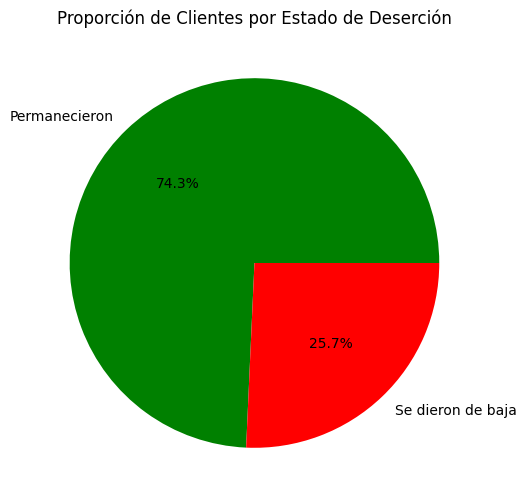

In [239]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar los valores de la variable Desercion
conteo_desercion = df_clean['Desercion'].value_counts()

# Mapear los valores booleanos a etiquetas personalizadas
etiquetas = ['Permanecieron' if val == False else 'Se dieron de baja' for val in conteo_desercion.index]

# Definir colores con l√≥gica
colors = ['green', 'red'] if False in conteo_desercion.index else ['red', 'green']

# Gr√°fico de pastel
plt.figure(figsize=(6,6))
plt.pie(
    conteo_desercion.values,
    labels=etiquetas,
    autopct='%1.1f%%',
    colors=colors
)
plt.title('Proporci√≥n de Clientes por Estado de Deserci√≥n')
plt.show()

## Recuento de evasion por variables categoricas

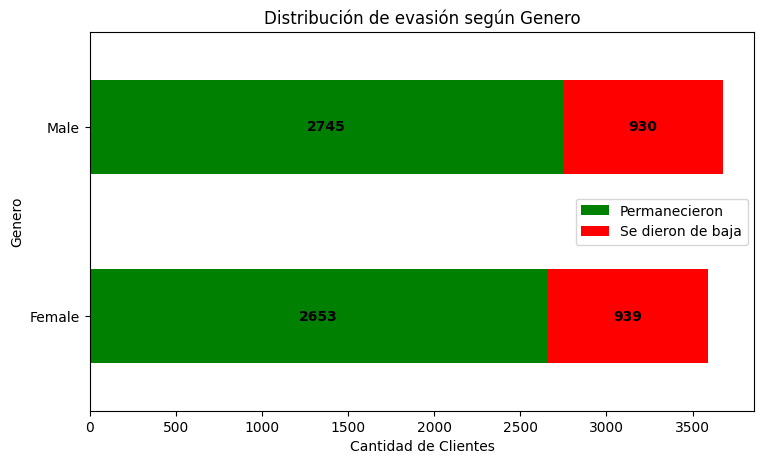

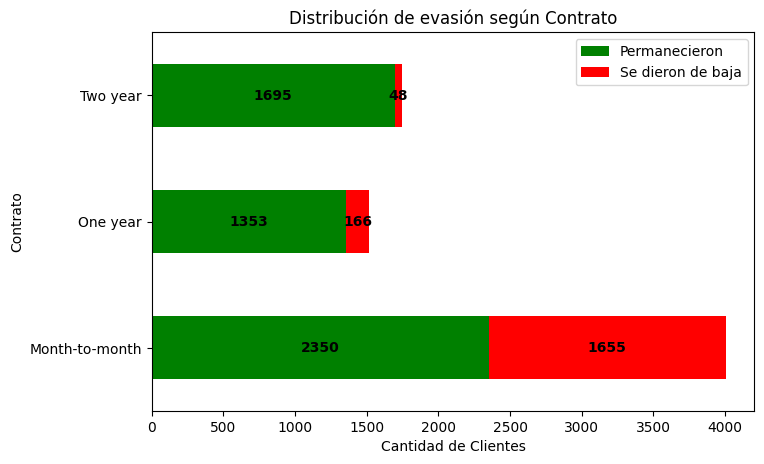

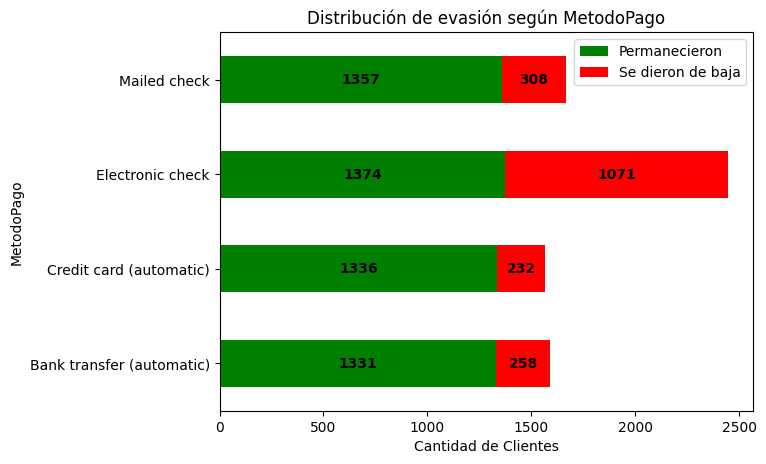

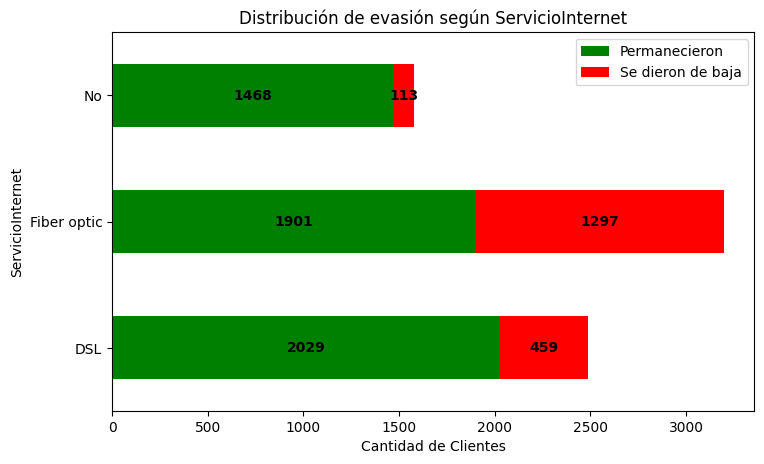

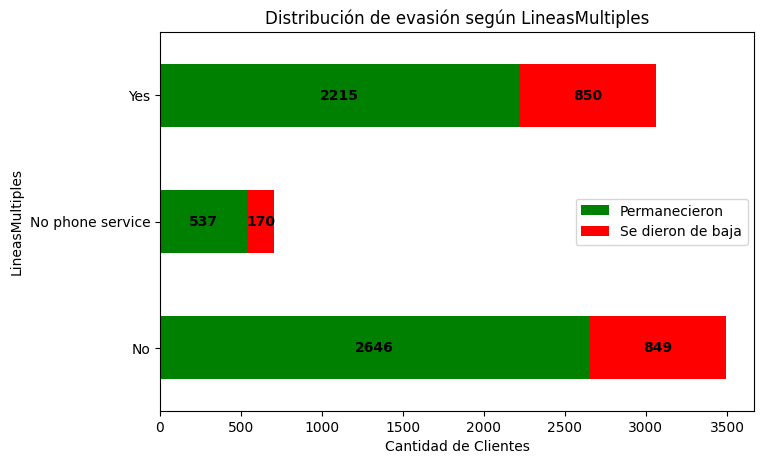

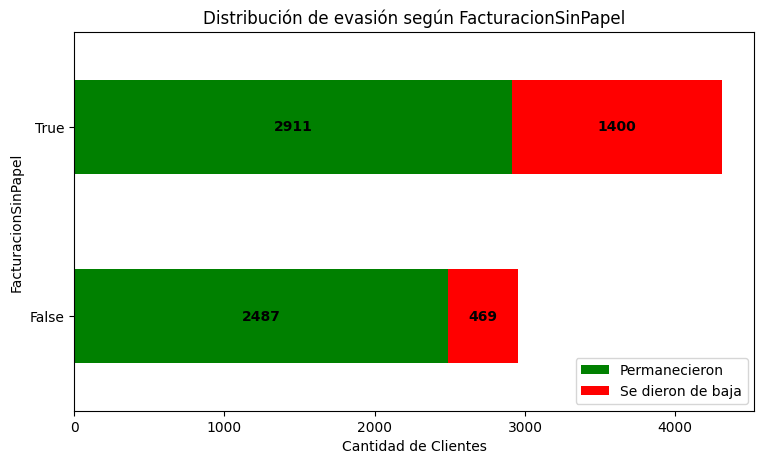

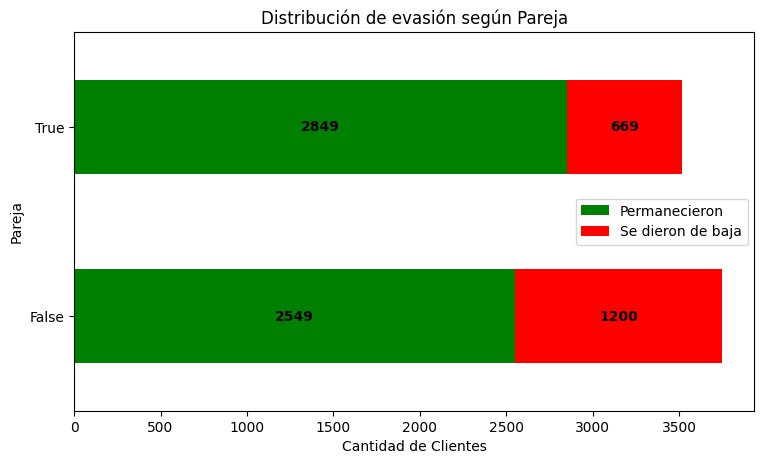

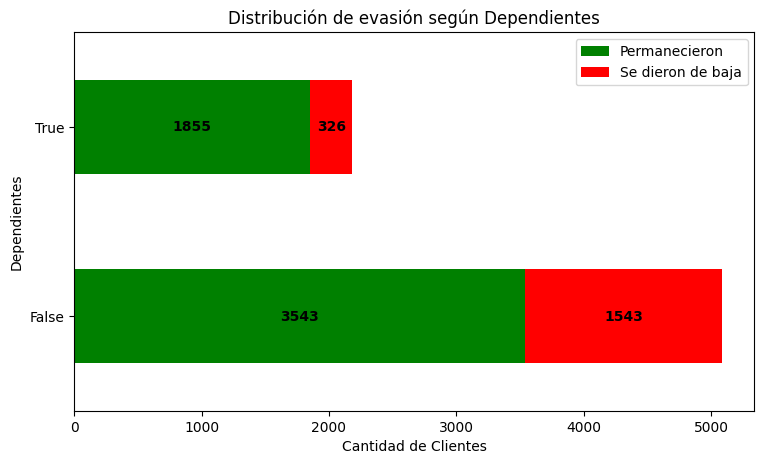

In [240]:
# Variables categ√≥ricas a analizar
variables_categoricas = [
    'Genero',
    'Contrato',
    'MetodoPago',
    'ServicioInternet',
    'LineasMultiples',
    'FacturacionSinPapel',
    'Pareja',
    'Dependientes'
]

# Gr√°ficos de barras horizontales apiladas
for col in variables_categoricas:
    ct = pd.crosstab(df_clean[col], df_clean['Desercion'])  # conteo absoluto

    ax = ct.plot(kind='barh', stacked=True, figsize=(8, 5),
                 color={False: 'green', True: 'red'})

    # A√±adir etiquetas dentro de las barras
    for p in ax.patches:
        width = p.get_width()
        if width > 0:
            x = p.get_x() + width / 2
            y = p.get_y() + p.get_height() / 2
            ax.text(x, y, f'{int(width)}', ha='center', va='center',
                    fontsize=10, color='black', fontweight='bold')

    plt.title(f'Distribuci√≥n de evasi√≥n seg√∫n {col}')
    plt.ylabel(col)
    plt.xlabel('Cantidad de Clientes')
    plt.legend(['Permanecieron', 'Se dieron de baja'])
    plt.tight_layout(pad=2)
    plt.show()
    print('\n' * 2)


## Conteo de evasi√≥n por variables num√©ricas

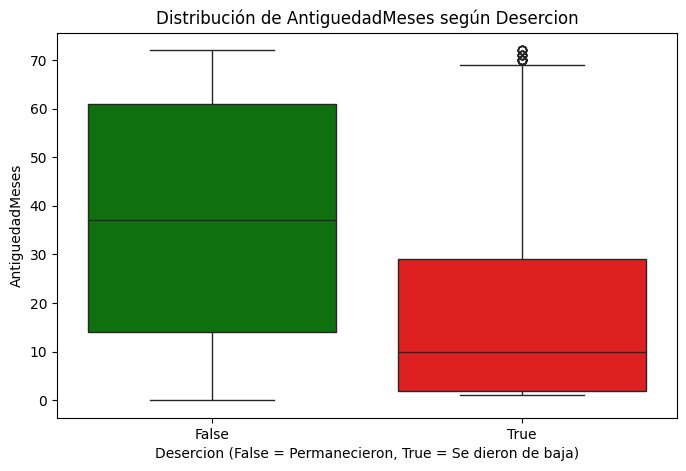

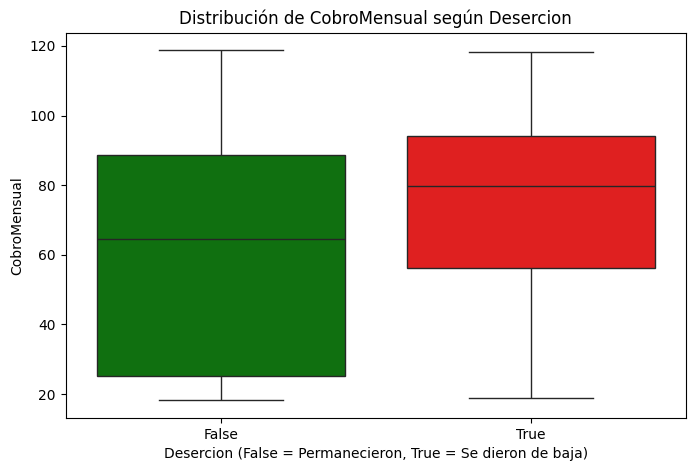

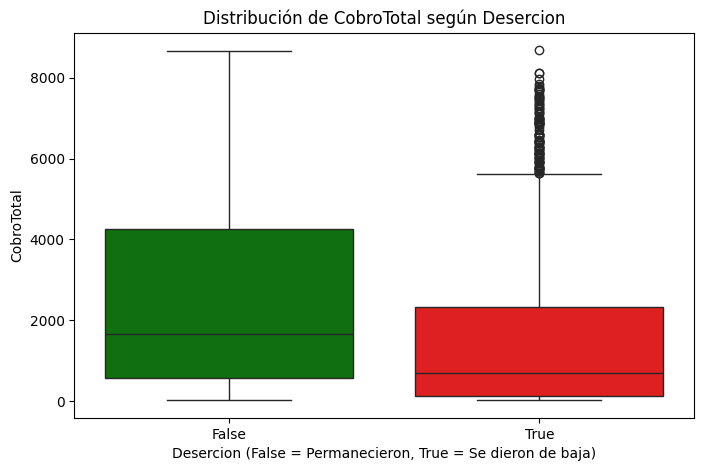

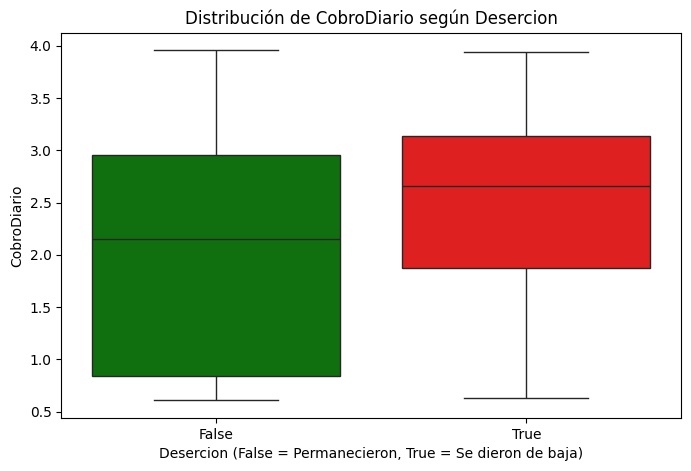

In [241]:
numericas = ['AntiguedadMeses', 'CobroMensual', 'CobroTotal', 'CobroDiario']

# Box charts

palette = {'False': "green", 'True': "red",False: "green", True: "red"}

for col in numericas:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df_clean, x='Desercion', y=col, hue='Desercion', palette=palette, legend=False)
    plt.title(f'Distribuci√≥n de {col} seg√∫n Desercion')
    plt.xlabel('Desercion (False = Permanecieron, True = Se dieron de baja)')
    plt.ylabel(col)
    plt.show()
    print('\n' * 2)

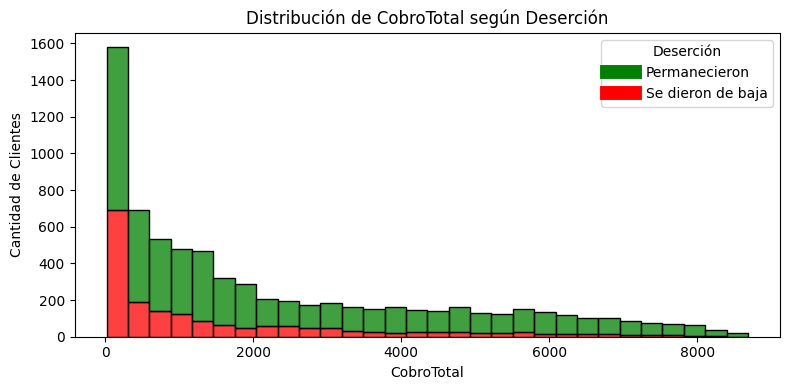

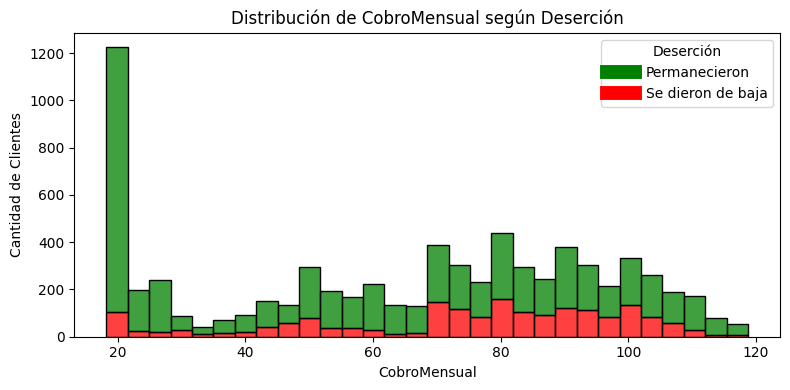

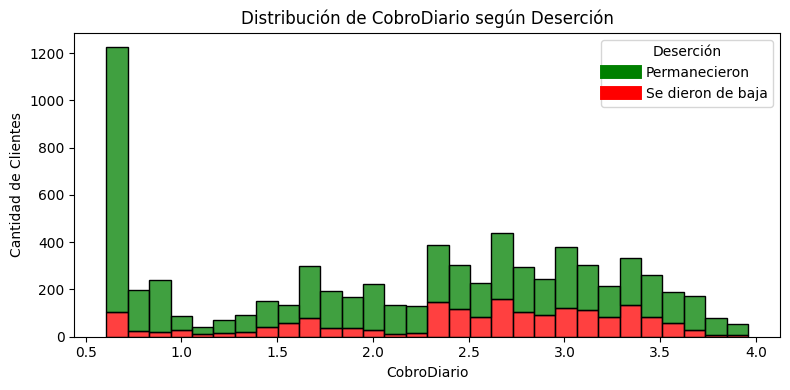

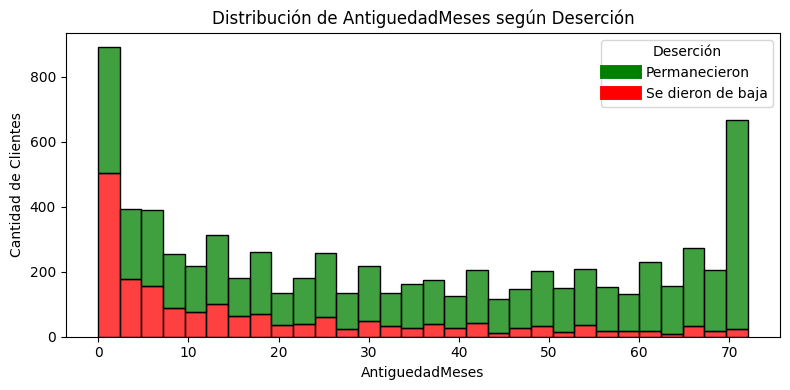

In [242]:
# histograma
num_cols = ['CobroTotal', 'CobroMensual', 'CobroDiario', 'AntiguedadMeses']
labels = {False: 'Permanecieron', True: 'Se dieron de baja'}

for col in num_cols:
    plt.figure(figsize=(8, 4))

    # configurar histograma acumulado con la paleta
    ax = sns.histplot(
        data=df_clean,
        x=col,
        hue='Desercion',
        multiple='stack',
        bins=30,
        palette=palette,
        legend=False  # para agregar la leyenda manualmente
    )

    # crear leyenda
    handles = [
        plt.Line2D([0], [0], color=palette[False], lw=10),
        plt.Line2D([0], [0], color=palette[True], lw=10)
    ]
    plt.legend(handles, [labels[False], labels[True]], title='Deserci√≥n')

    plt.title(f'Distribuci√≥n de {col} seg√∫n Deserci√≥n')
    plt.xlabel(col)
    plt.ylabel('Cantidad de Clientes')
    plt.tight_layout()
    plt.show()
    print('\n' * 2)

#üìÑInforme Final de An√°lisis de Evasi√≥n de Clientes (Churn)

## 1. Introducci√≥n

El objetivo de este an√°lisis es entender el fen√≥meno de la evasi√≥n de clientes (churn) en la empresa, identificando patrones y variables que influyen en la decisi√≥n de los clientes de cancelar el servicio. A trav√©s del an√°lisis de datos num√©ricos y categ√≥ricos, buscamos proporcionar insights valiosos para dise√±ar estrategias que reduzcan la tasa de deserci√≥n y mejoren la retenci√≥n.

## 2. Limpieza y Tratamiento de Datos

Se trabaj√≥ con un conjunto de datos original que conten√≠a variables num√©ricas y categ√≥ricas. Los pasos principales fueron:

*   Identificacion de datos y sus tipos
*   Validaci√≥n de consistencia y correcci√≥n de datos at√≠picos.
*   Estandarizacion y transformacion de datos.
*   Creacion de columnas nuevas.
*   Conversi√≥n de tipos de datos.
*   Renombrado de columnas.

## 3. An√°lisis Exploratorio de Datos


### 3.1 An√°lisis descriptivo

| Variable            | Conteo | Media     | Desviaci√≥n Est√°ndar | M√≠nimo | 25%    | 50%    | 75%    | M√°ximo  | Mediana |
|---------------------|--------|-----------|-----------|-------|--------|--------|--------|---------|---------|
| Antig√ºedad (Meses)  | 7267   | 32.35     | 24.57     | 0     | 9      | 29     | 55     | 72      | 29      |
| Cobro Mensual       | 7267   | 64.72     | 30.13     | 18.25 | 35.43  | 70.30  | 89.88  | 118.75  | 70.30   |
| Cobro Total         | 7256   | 2280.63   | 2268.63   | 18.8  | 400.23 | 1391   | 3785.3 | 8684.8  | 1391    |
| Cobro Diario        | 7267   | 2.16      | 1.00      | 0.61  | 1.18   | 2.34   | 3.00   | 3.96    | 2.34    |

### 3.2 Proporci√≥n general de evasi√≥n

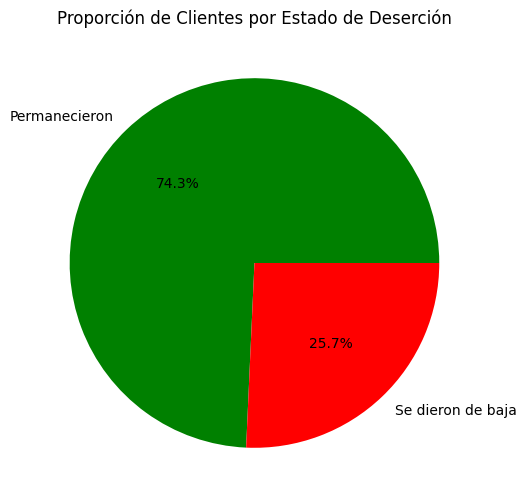

### 3.3 Distribuci√≥n de evasi√≥n seg√∫n variables categ√≥ricas

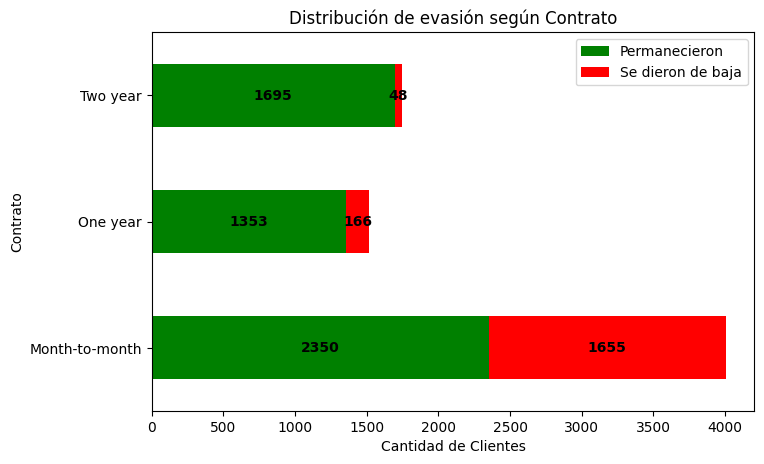

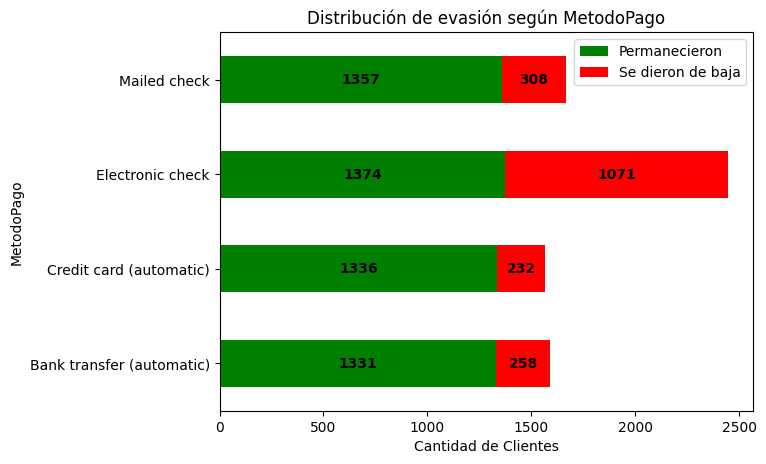

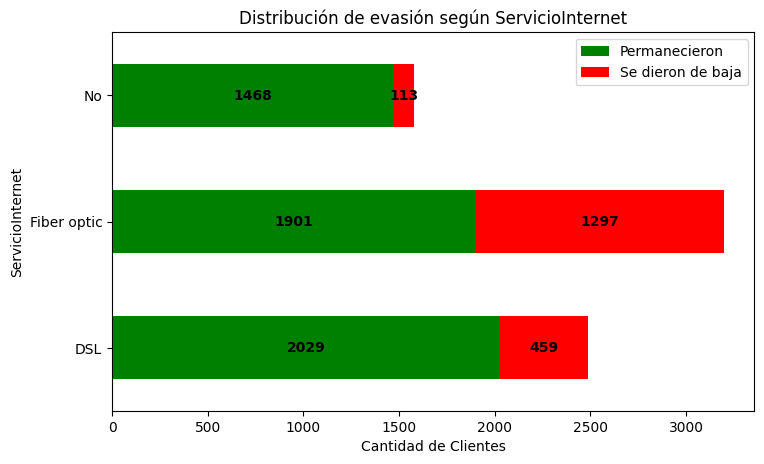

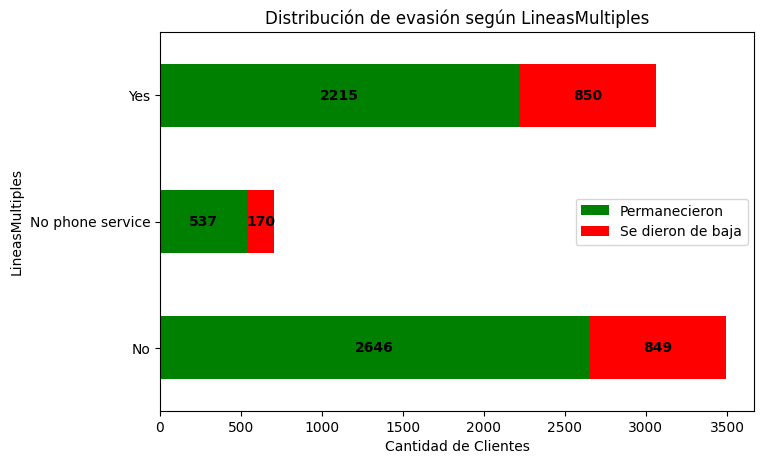

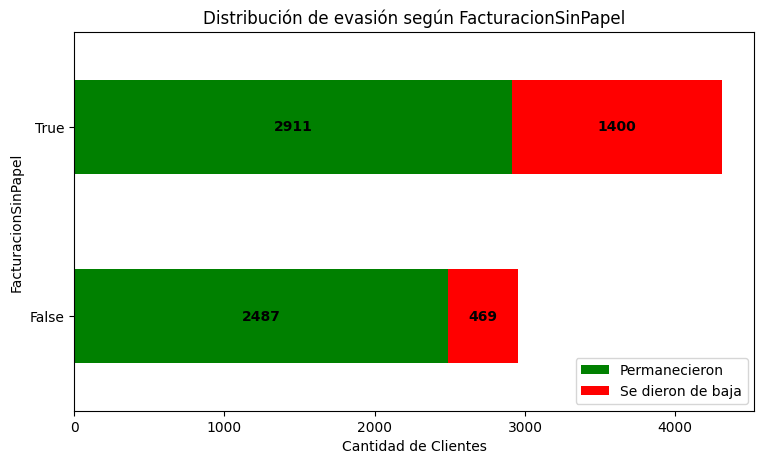

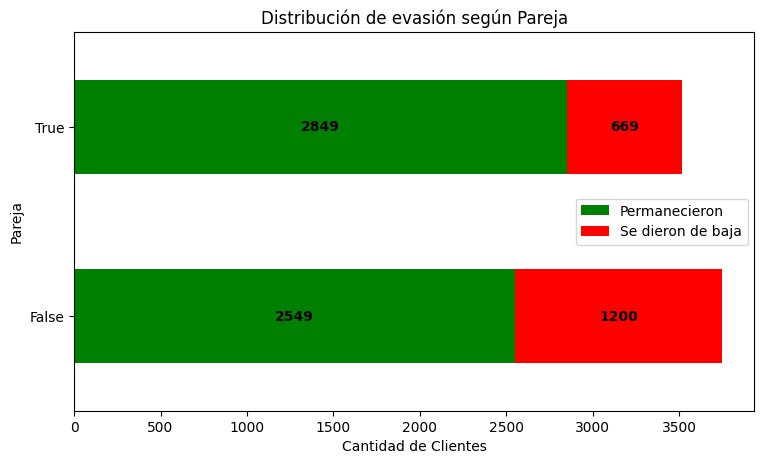

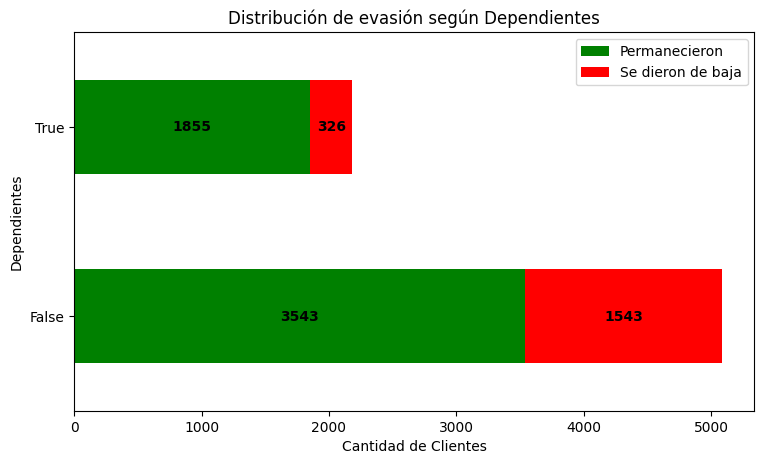

### 3.4 Distribuci√≥n de variables num√©ricas seg√∫n deserci√≥n (Boxplots)

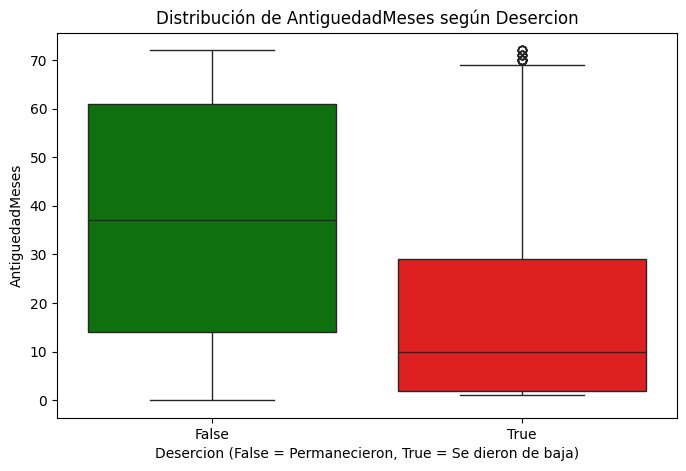

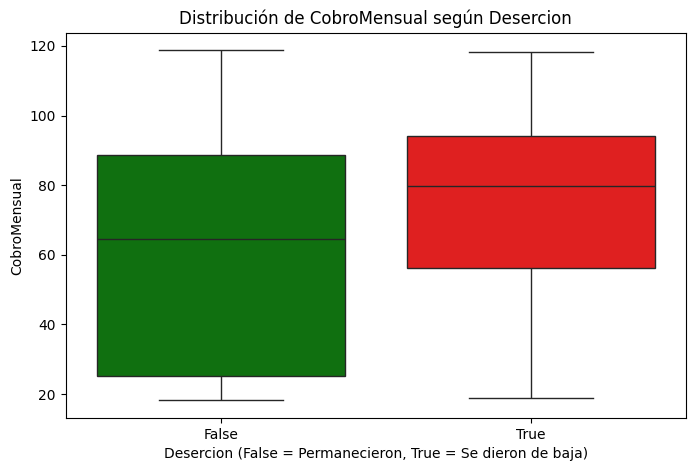

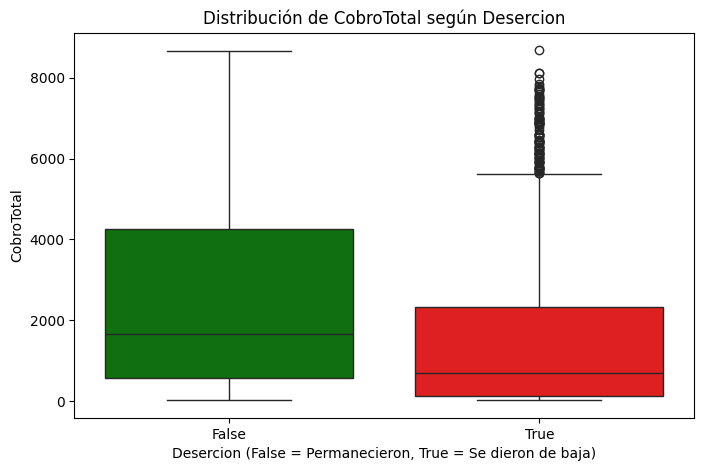

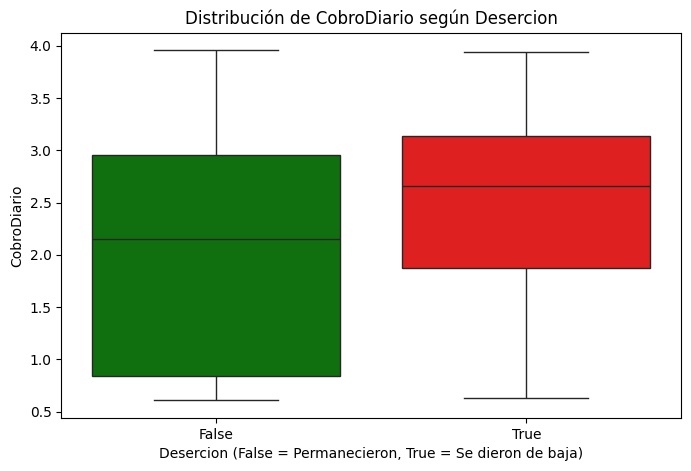

### 3.5 Histograma y tendencias clave

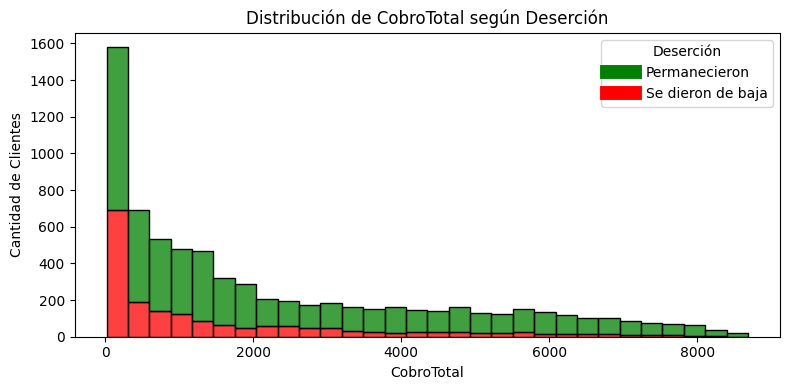

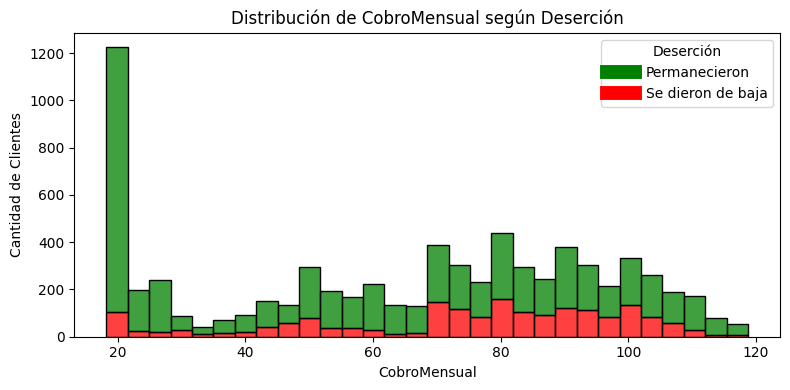

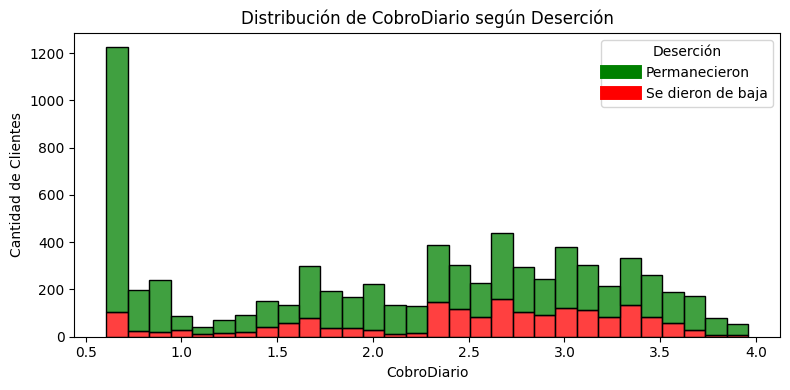

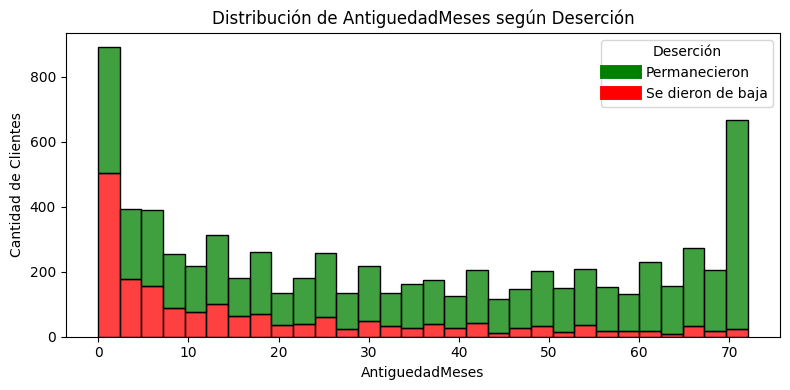

## 4. Conclusiones e Insights

*   La mayor√≠a de clientes que se dan de baja tienen contratos mes a mes (1655 bajas), mientras que solo 48 clientes con contrato de dos a√±os se dieron de baja, lo que demuestra que la fidelizaci√≥n a largo plazo es altamente efectiva para retener clientes.

*   El m√©todo de pago tambi√©n es un factor determinante. El cheque electr√≥nico presenta 1071 bajas, casi la mitad del total de deserciones, mientras que m√©todos autom√°ticos como transferencias bancarias (258 bajas) o tarjeta de cr√©dito (232 bajas) presentan tasas mucho menores.

*   En cuanto al servicio de internet, la fibra √≥ptica tiene 1297 clientes que se dieron de baja, lo que la convierte en el tipo de conexi√≥n con m√°s deserciones, a pesar de ser popular. Esto puede deberse a costos elevados o expectativas no cumplidas.

*   Los clientes sin l√≠neas m√∫ltiples presentan una tasa de deserci√≥n ligeramente menor (849 de 3495 ‚âà 24.3%) comparado con los que tienen l√≠neas m√∫ltiples (850 de 3065 ‚âà 27.7%). Aunque los valores son similares, esto sugiere que contar con varias l√≠neas no garantiza mayor retenci√≥n.

*   En cuanto a la facturaci√≥n sin papel, aunque m√°s clientes que la utilizan permanecen (2911) que los que no la usan (2487), tambi√©n tienen m√°s deserciones absolutas (1400 vs. 469). Esto puede indicar que la facturaci√≥n digital es popular, pero no necesariamente se relaciona con una mayor retenci√≥n.

*   La antig√ºedad del cliente es un predictor clave: quienes han estado m√°s tiempo con la empresa tienen muchas m√°s probabilidades de quedarse. Por ejemplo, la mediana de antig√ºedad de los que permanecen es de aproximadamente 38 meses, mientras que para los que se dan de baja es de aproximadamente 10 meses.

*   Clientes que pagan menos mensualmente (debajo de 70) o por d√≠a (debajo de 2.4) tienen una mayor tasa de permanencia. A partir de esos valores ‚Äî70 en cobro mensual y 2.4 en cobro diario‚Äî comienza a observarse una tendencia creciente de deserci√≥n.

*   Finalmente, aunque los clientes que pagan poco tienden a cancelar con m√°s frecuencia, tambi√©n hay clientes de alto valor que abandonan, lo cual indica que deben considerarse otros factores como la satisfacci√≥n del cliente, la atenci√≥n y el soporte t√©cnico.

## 5. Recomendaciones

*   **Promover contratos a largo plazo:** Ofrecer incentivos y beneficios claros para que los clientes opten por contratos anuales o bienales.

*   **Optimizar m√©todos de pago:** Facilitar y promover m√©todos autom√°ticos y seguros, reduciendo el uso de cheques electr√≥nicos que correlacionan con mayor deserci√≥n.

*   **Segmentar clientes nuevos para retenci√≥n temprana:** Implementar campa√±as espec√≠ficas para clientes en sus primeros meses, con atenci√≥n personalizada y ofertas para aumentar su permanencia.

*   **Revisar y mejorar servicio de fibra √≥ptica:** Investigar causas de alta deserci√≥n en clientes con este servicio y tomar acciones para mejorar la satisfacci√≥n.

*   **Fomentar el uso de l√≠neas m√∫ltiples y facturaci√≥n sin papel:** Incentivar la adopci√≥n de servicios adicionales y digitalizaci√≥n para fortalecer la relaci√≥n con el cliente.

*   **Monitorizar cobros mensuales y diarios:** Identificar patrones de riesgo y ajustar planes o servicios para evitar la p√©rdida de clientes que se encuentran en rangos cr√≠ticos de gasto.

# An√°lisis de correlaci√≥n entre variables

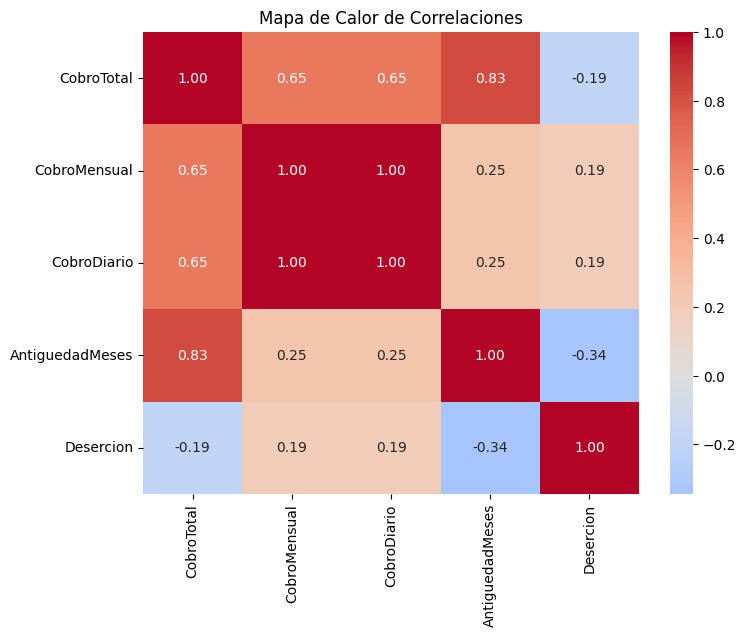

In [247]:
# Seleccionar columnas numericas relevantes para la correlacion
num_cols = ['CobroTotal', 'CobroMensual', 'CobroDiario', 'AntiguedadMeses']

# Computar la matrix de la correlation
corr = df_clean[num_cols + ['Desercion']].corr()

# Graficar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

## Desgloce de correlaciones observadas

**1. Correlaci√≥n entre variables de cobro:**

*   Cobro Mensual y Cobro Diario tienen una correlaci√≥n perfecta (1.0) entre s√≠. Esto es muy importante: sugiere que Cobro Mensual y Cobro Diario son pr√°cticamente la misma variable o se derivan directamente una de la otra sin mucha variaci√≥n.
*   Cobro Total tiene una correlaci√≥n alta (0.65) con Cobro Mensual y Cobro Diario. Esto es esperable, ya que el cobro total se acumula a partir de los cobros peri√≥dicos.

**2. Correlaci√≥n de Antig√ºedad en Meses:**

*   Antig√ºedad en Meses tiene una correlaci√≥n fuerte con Cobro Total (0.83). Esto es l√≥gico: cuanto m√°s tiempo un cliente ha estado con la empresa, mayor ser√° su cobro total acumulado.
*   Antig√ºedad en Meses tiene una correlaci√≥n d√©bil con Cobro Mensual y Cobro Diario (0.25). Esto es interesante, ya que sugiere que el monto que paga un cliente mensualmente o diariamente no aumenta significativamente con su antig√ºedad, o al menos no de forma lineal fuerte.

**3. Correlaci√≥n de Deserci√≥n (Churn):**

*   Deserci√≥n y Antig√ºedad en Meses: Hay una correlaci√≥n negativa moderada (-0.34). Esto indica que cuanto mayor es la antig√ºedad del cliente, menor es la probabilidad de que deserte. Los clientes m√°s leales tienden a quedarse.
*   Deserci√≥n y Cobro Total: Hay una correlaci√≥n negativa d√©bil (-0.19). Esto sugiere que un Cobro Total acumulado m√°s alto podr√≠a estar muy ligeramente asociado con una menor deserci√≥n, pero esta relaci√≥n es mucho m√°s d√©bil que la de la antig√ºedad.
*   Deserci√≥n y Cobro Mensual / Cobro Diario: Hay una correlaci√≥n positiva d√©bil (0.19). Esto es lo m√°s contraintuitivo y crucial: un Cobro Mensual o Cobro Diario m√°s alto se asocia d√©bilmente con una MAYOR probabilidad de deserci√≥n. Esto podr√≠a indicar que los clientes con facturas peri√≥dicas m√°s altas son m√°s propensos a irse, quiz√°s por percibir un alto costo o buscar alternativas.

## Insights Valiosos para Modelos Predictivos Robustos

**1. Reducci√≥n de Dimensionalidad:**

*   Cobro Mensual y Cobro Diario son redundantes, dado que tienen una correlaci√≥n de 1.0 entre s√≠.

**2. Antig√ºedad en Meses como Predictor Clave:**
*   La Antig√ºedad en Meses es un predictor muy importante para la deserci√≥n. Su correlaci√≥n negativa de -0.34 indica que es una variable clave para identificar a los clientes menos propensos a la deserci√≥n. Esta variable deber√≠a tener un peso significativo.

**3. Interpretaci√≥n del Cobro Mensual/Diario y la Deserci√≥n:**
*   La correlaci√≥n positiva (0.19) entre Cobro Mensual/Diario y Deserci√≥n es un hallazgo intrigante.
*   Hip√≥tesis 1: Problema de precio/valor: Los clientes que pagan m√°s mensualmente podr√≠an sentir que el servicio no justifica el costo, o que hay mejores ofertas en la competencia.
*   Hip√≥tesis 2: Clientes de alto uso/demanda: Podr√≠a ser que los clientes con mayores cobros son tambi√©n los que usan m√°s servicios, lo que podr√≠a llevar a m√°s puntos de fricci√≥n (ej., problemas de calidad, interrupciones, etc.) o simplemente m√°s oportunidades para comparar con la competencia.

**4. Consideraci√≥n de Cobro Total:**
*   Cobro Total tiene una correlaci√≥n muy fuerte con Antig√ºedad en Meses (0.83). Aunque tiene una correlaci√≥n d√©bil con Deserci√≥n (-0.19), su informaci√≥n est√° en gran medida contenida en Antig√ºedad. Se podr√≠a considerar si Cobro Total a√±ade valor predictivo adicional m√°s all√° de Antig√ºedad o si es redundante. Si el modelo se desempe√±a bien con solo Antig√ºedad, Cobro Total podr√≠a no ser estrictamente necesario.